In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load training data from file
def preprocess_data_from_file(filepath):
    with open(filepath, 'r') as file:
        data = file.read()
    lines = data.strip().split('\n')
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(' ', 1)
        label = int(label.split('__label__')[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

# Function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    # Lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[\W_]+', ' ', text)
    
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens, ' '.join(tokens)

# Function to tokenize and pad sequences
def tokenize_and_pad_sequences(X_tokens, max_vocab_size=20000, max_sequence_length=None):
    # Convert tokens to text for tokenizer
    texts = [' '.join(tokens) for tokens in X_tokens]
    
    # Initialize tokenizer
    tokenizer = Tokenizer(num_words=max_vocab_size)
    tokenizer.fit_on_texts(texts)
    
    # Convert texts to sequences
    sequences = tokenizer.texts_to_sequences(texts)
    
    # Determine maximum sequence length
    max_length = max(len(seq) for seq in sequences)
    if max_sequence_length is None:
        max_sequence_length = max_length
    else:
        max_sequence_length = min(max_sequence_length, max_length)
    
    # Print word counts and vocabulary size
    print(f"Word Counts: {tokenizer.word_counts}\n")
    print(f"Word Index: {tokenizer.word_index}\nVocabulary Size: {len(tokenizer.word_index)}\n")
    
    # Print example of tokenization
    print(f"Example of Original Tokens:\n{X_tokens[0]}\n")
    print(f"Example of Tokenized Sequence:\n{sequences[0]}\n")
    
    # Print maximum sequence length
    print(f"Maximum sequence length in the dataset: {max_length}\n")
    
    # Pad sequences
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
    
    # Print example of padded sequence
    print(f"Example of Padded Sequence:\n{padded_sequences[0]}\nLength: {len(padded_sequences[0])}\n")
    
    return padded_sequences, tokenizer

# Example usage:
train_filepath = 'train.3270.txt'
df_train = preprocess_data_from_file(train_filepath)

# Apply the preprocessing function
df_train[['tokens', 'text']] = df_train['text'].apply(lambda x: pd.Series(preprocess_text(x)))

# Split data into features and labels
X_tokens = df_train['tokens']
y = df_train['label']

# Tokenize and pad sequences
max_vocab_size = 20000
max_sequence_length = None  # Set to None to dynamically determine based on data

padded_sequences, tokenizer = tokenize_and_pad_sequences(X_tokens, max_vocab_size, max_sequence_length)

# Split into training and validation sets
X_train_padded, X_val_padded, y_train, y_val = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HUYNGUYEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HUYNGUYEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Word Counts: OrderedDict([('stuning', 1), ('even', 464), ('non', 47), ('gamer', 2), ('sound', 197), ('track', 136), ('beautiful', 78), ('paint', 17), ('senery', 1), ('mind', 91), ('well', 472), ('would', 766), ('recomend', 14), ('people', 288), ('hate', 47), ('vid', 1), ('game', 270), ('music', 303), ('played', 53), ('chrono', 5), ('cross', 11), ('ever', 260), ('best', 342), ('back', 325), ('away', 107), ('crude', 13), ('keyboarding', 1), ('take', 223), ('fresher', 1), ('step', 27), ('grate', 1), ('guitar', 38), ('soulful', 5), ('orchestra', 2), ('impress', 6), ('anyone', 174), ('care', 59), ('listen', 99), ('soundtrack', 28), ('anything', 114), ('reading', 286), ('lot', 210), ('review', 247), ('saying', 28), ('figured', 18), ('write', 44), ('disagree', 4), ('bit', 130), ('opinino', 1), ('yasunori', 2), ('mitsuda', 4), ('ultimate', 3), ('masterpiece', 29), ('timeless', 13), ('listening', 53), ('year', 409), ('beauty', 20), ('simply', 81), ('refuse', 8), ('fade', 6), ('price', 169), ('t

In [10]:
tokenizer.word_index['stuning'], tokenizer.word_index['even']

(7686, 17)

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load training data from file
def preprocess_data_from_file(filepath):
    with open(filepath, 'r') as file:
        data = file.read()
    lines = data.strip().split('\n')
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(' ', 1)
        label = int(label.split('__label__')[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

# Function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    # Lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[\W_]+', ' ', text)
    
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens, ' '.join(tokens)

# Function to create vocabulary and sequences
def create_vocab_and_sequences(X_tokens):
    # Create vocabulary set
    vocab = set()
    for tokens in X_tokens:
        vocab.update(tokens)
    
    # Create a mapping from word to index
    word_index = {word: idx + 1 for idx, word in enumerate(vocab)}  # +1 to reserve 0 for padding
    
    # Convert tokens to sequences
    sequences = [[word_index[word] for word in tokens] for tokens in X_tokens]
    
    return sequences, word_index

# Example usage:
train_filepath = 'train.3270.txt'
df_train = preprocess_data_from_file(train_filepath)

# Apply the preprocessing function
df_train[['tokens', 'text']] = df_train['text'].apply(lambda x: pd.Series(preprocess_text(x)))

# Split data into features and labels
X_tokens = df_train['tokens']
y = df_train['label']

# Create vocabulary and sequences
sequences, word_index = create_vocab_and_sequences(X_tokens)

# Determine maximum sequence length
max_length = max(len(seq) for seq in sequences)

# Pad sequences
max_sequence_length = max_length  # Or set to a fixed value if desired
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Print vocabulary and sequences
print(f"Vocabulary Size: {len(word_index)}\n")
print(f"Word Index: {word_index}\n")
print(f"Example of Original Tokens:\n{X_tokens[0]}\n")
print(f"Example of Tokenized Sequence:\n{sequences[0]}\n")
print(f"Example of Padded Sequence:\n{padded_sequences[0]}\nLength: {len(padded_sequences[0])}\n")

# Split into training and validation sets
X_train_padded, X_val_padded, y_train, y_val = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HUYNGUYEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HUYNGUYEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Vocabulary Size: 15083

Word Index: {'della': 1, 'cheapest': 2, 'loping': 3, 'informs': 4, 'root': 5, 'mayor': 6, 'voltage': 7, 'nine': 8, 'martian': 9, 'gilliard': 10, 'laying': 11, 'ace': 12, 'either': 13, 'friendly': 14, 'discontiued': 15, 'set': 16, 'anthony': 17, 'taping': 18, 'rewrite': 19, 'ready': 20, 'compulsive': 21, 'jmm': 22, 'sandra': 23, 'ecstasy': 24, 'filmakers': 25, 'wasit': 26, 'nowthat': 27, 'scratched': 28, 'desperately': 29, 'rubberized': 30, 'tax': 31, 'magnificence': 32, 'compeling': 33, 'evolves': 34, 'incredulous': 35, 'vet': 36, 'talking': 37, 'virtual': 38, 'sorrry': 39, 'hilditch': 40, 'thenineteenth': 41, 'hood': 42, 'mourir': 43, 'alos': 44, 'heartbroken': 45, 'auxuliary': 46, 'explains': 47, 'forward': 48, 'knight': 49, 'recommanded': 50, 'vid': 51, 'watermelon': 52, 'angry': 53, 'putting': 54, 'tart': 55, '052': 56, 'leavesthe': 57, 'intead': 58, 'psychedelic': 59, 'warcraft': 60, 'porcelain': 61, 'camus': 62, 'chef': 63, 'glued': 64, 'naysayer': 65, 'na

In [4]:
word_index['stuning']

5229

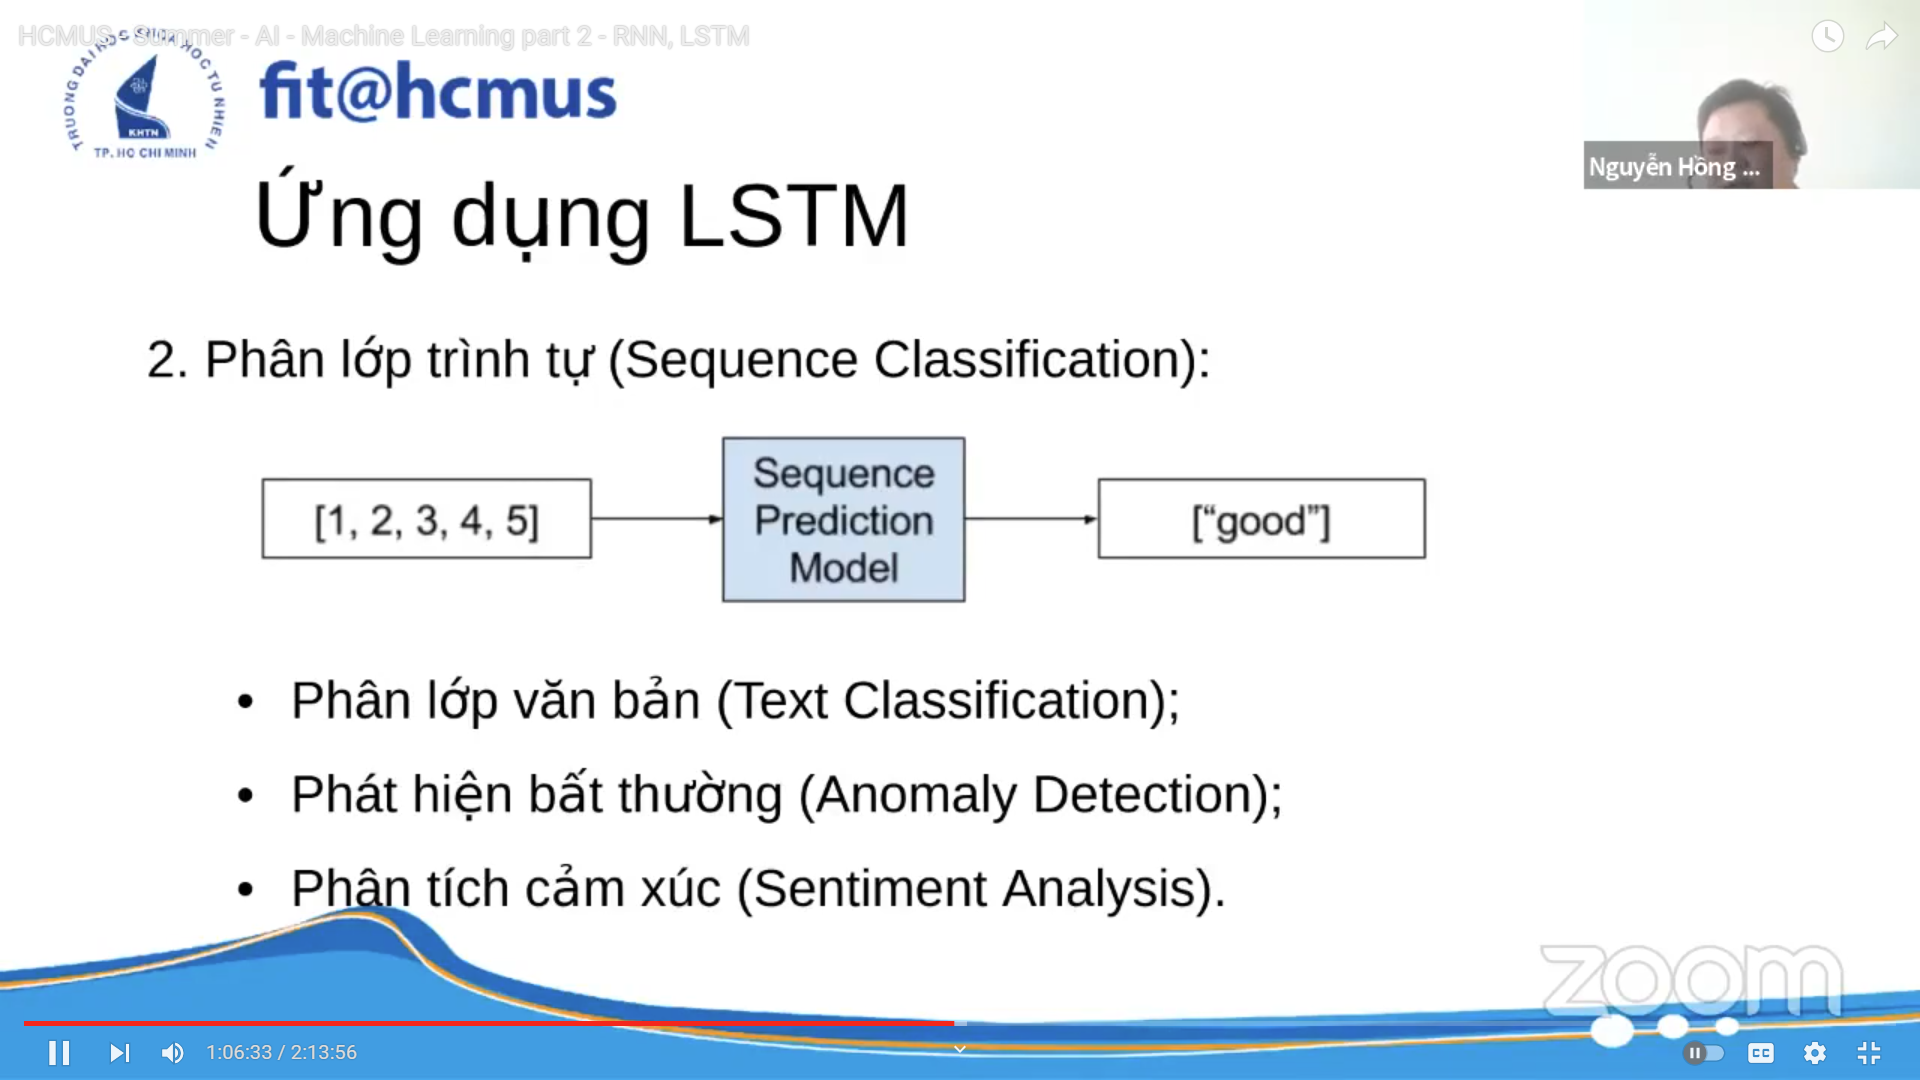

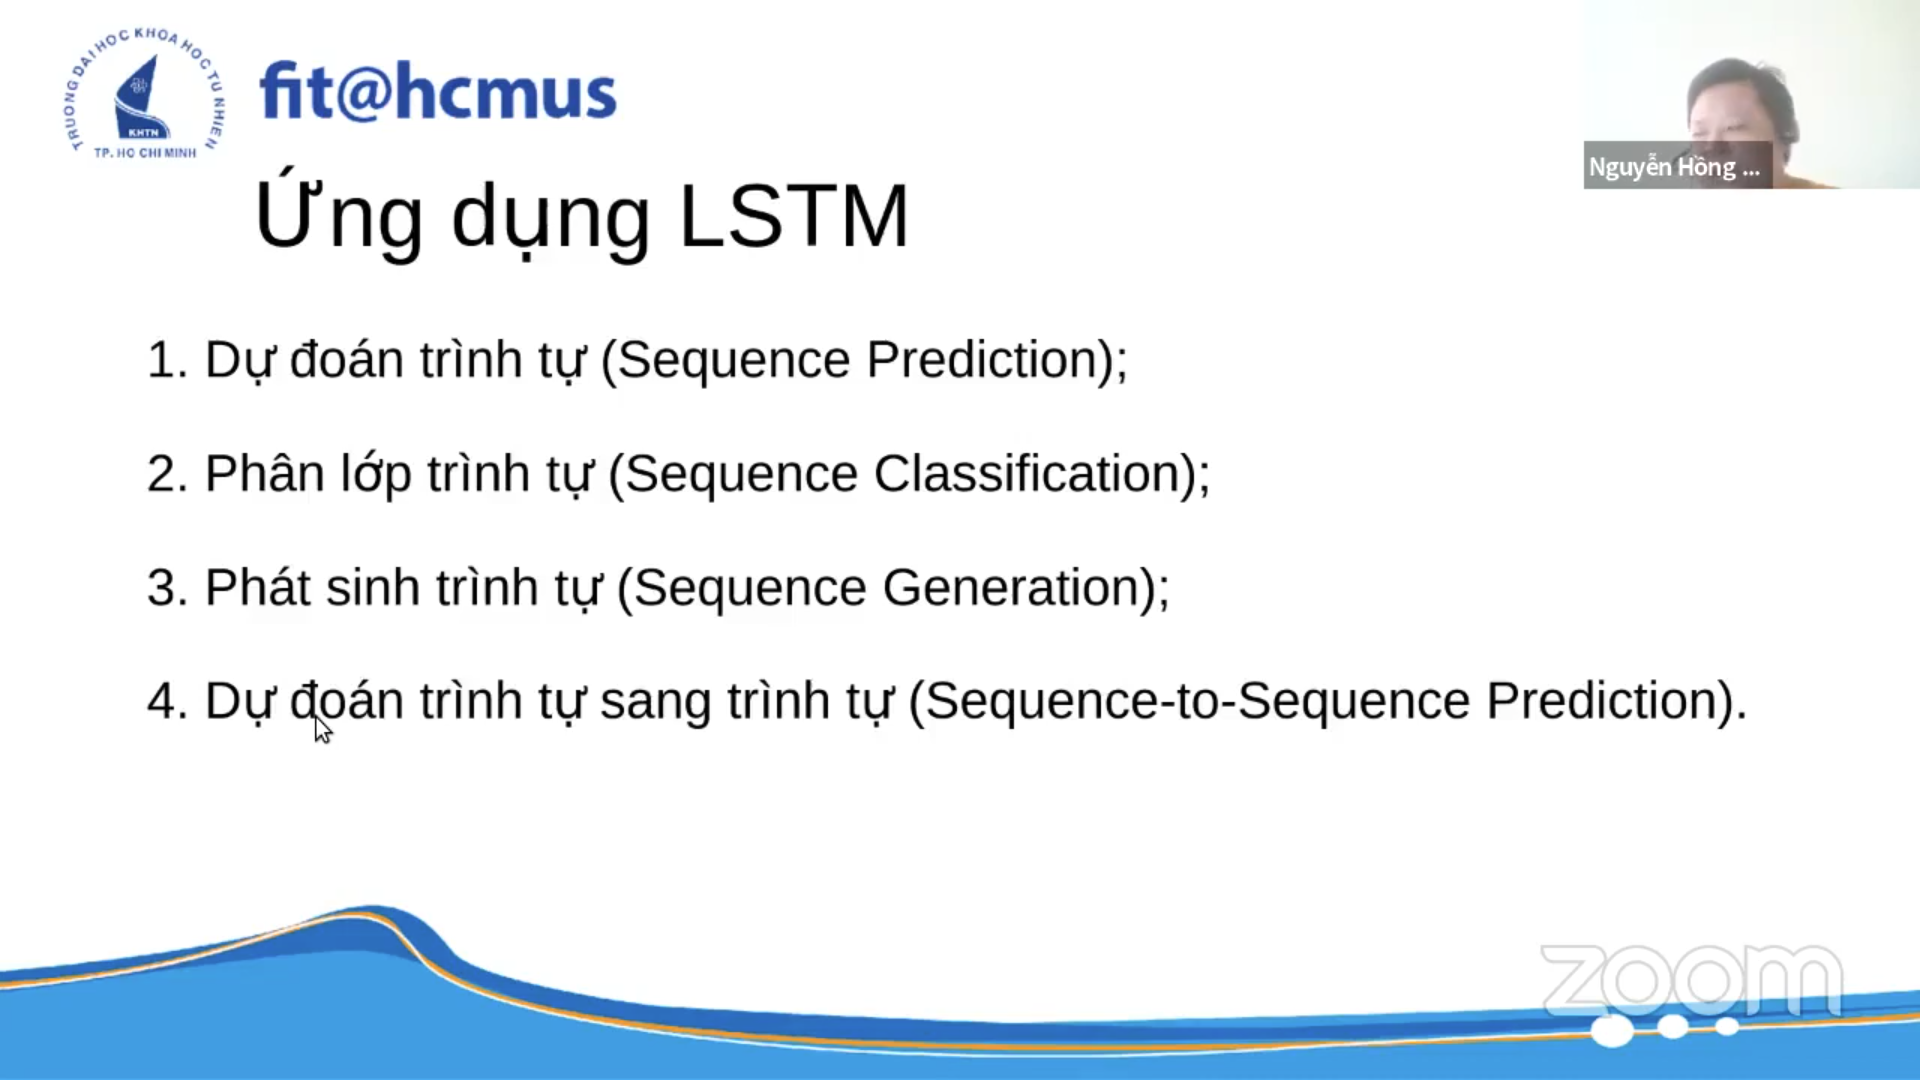

#### Test3

In [ ]:
import numpy as np
import re
from collections import defaultdict

class Tokenizer:
    def __init__(self, num_words=None):
        self.num_words = num_words
        self.word_index = {}
        self.index_word = {}
        self.word_counts = defaultdict(int)
        self.oov_token = "<OOV>"

    def fit_on_texts(self, texts):
        for text in texts:
            words = self._tokenize(text)
            for word in words:
                self.word_counts[word] += 1

        # Sort words by frequency
        sorted_words = sorted(self.word_counts.items(), key=lambda item: item[1], reverse=True)
        
        # Create word index
        self.word_index = {self.oov_token: 1}
        self.index_word = {1: self.oov_token}
        for idx, (word, count) in enumerate(sorted_words):
            if self.num_words and idx + 2 >= self.num_words:
                break
            self.word_index[word] = idx + 2  # +2 because 0 is reserved for padding and 1 for OOV
            self.index_word[idx + 2] = word

    def texts_to_sequences(self, texts):
        sequences = []
        for text in texts:
            words = self._tokenize(text)
            sequence = [self.word_index.get(word, 1) for word in words]  # 1 is the index for OOV
            sequences.append(sequence)
        return sequences

    def _tokenize(self, text):
        text = text.lower()
        text = re.sub(r'[\W_]+', ' ', text)
        tokens = text.split()
        return tokens

def pad_sequences(sequences, maxlen, padding='post'):
    padded_sequences = np.zeros((len(sequences), maxlen), dtype=int)
    for i, sequence in enumerate(sequences):
        if len(sequence) > maxlen:
            if padding == 'post':
                padded_sequences[i] = sequence[:maxlen]
            else:
                padded_sequences[i] = sequence[-maxlen:]
        else:
            if padding == 'post':
                padded_sequences[i, :len(sequence)] = sequence
            else:
                padded_sequences[i, -len(sequence):] = sequence
    return padded_sequences

# Example usage
tokenizer = Tokenizer(num_words=20000)

1. Preprocessing

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download necessary NLTK data
nltk.download("stopwords")
nltk.download("wordnet")


# Load training data from file
def preprocess_data_from_file(filepath):
    with open(filepath, "r") as file:
        data = file.read()
    lines = data.strip().split("\n")
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(" ", 1)
        label = int(label.split("__label__")[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({"label": labels, "text": texts})


train_filepath = "train.3270.txt"
df_train = preprocess_data_from_file(train_filepath)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r"\W", " ", text)
    text = re.sub(r"\s+", " ", text)

    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)


df_train["text"] = df_train["text"].apply(preprocess_text)

# Split data into features and labels
X = df_train["text"]
y = df_train["label"]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_vocab_size = 20000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_sequence_length)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HUYNGUYEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HUYNGUYEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


2. Define the RNN Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 100

model = Sequential()
model.add(
    Embedding(
        input_dim=max_vocab_size,
        output_dim=embedding_dim,
        input_length=max_sequence_length,
    )
)
model.add(LSTM(units=128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          2000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,117,377
Trainable params: 2,117,377
Non-trainable params: 0
_________________________________________________________________


3. Train the Model

In [4]:
batch_size = 32
epochs = 10

history = model.fit(
    X_train_padded,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_padded, y_val),
)

Epoch 1/10
82/82 [==============================] - 4s 43ms/step - loss: -6.5737 - accuracy: 0.5417 - val_loss: -11.1879 - val_accuracy: 0.5229
Epoch 2/10
82/82 [==============================] - 3s 40ms/step - loss: -13.0926 - accuracy: 0.5459 - val_loss: -16.3399 - val_accuracy: 0.5229
Epoch 3/10
82/82 [==============================] - 3s 39ms/step - loss: -17.9304 - accuracy: 0.5459 - val_loss: -21.1895 - val_accuracy: 0.5229
Epoch 4/10
82/82 [==============================] - 3s 39ms/step - loss: -22.4540 - accuracy: 0.5459 - val_loss: -25.9740 - val_accuracy: 0.5229
Epoch 5/10
82/82 [==============================] - 3s 41ms/step - loss: -26.9737 - accuracy: 0.5459 - val_loss: -30.7127 - val_accuracy: 0.5229
Epoch 6/10
82/82 [==============================] - 3s 39ms/step - loss: -31.4826 - accuracy: 0.5459 - val_loss: -35.3748 - val_accuracy: 0.5229
Epoch 7/10
82/82 [==============================] - 3s 41ms/step - loss: -35.7278 - accuracy: 0.5459 - val_loss: -40.0208 - val_acc

4. Evaluate the Model

In [5]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_padded, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Predict on new data
new_texts = ["This product is great!", "I did not like this book at all."]
new_texts_preprocessed = [preprocess_text(text) for text in new_texts]
new_texts_sequences = tokenizer.texts_to_sequences(new_texts_preprocessed)
new_texts_padded = pad_sequences(new_texts_sequences, maxlen=max_sequence_length)

predictions = model.predict(new_texts_padded)
print(predictions)

Validation Accuracy: 52.29%
1/1 [==============================] - 0s 194ms/step
[[1.]
 [1.]]


#### Test2

In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Download necessary NLTK data
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")


# Function to preprocess data from text file
def preprocess_data_from_file(filepath):
    with open(filepath, "r") as file:
        data = file.read()
    lines = data.strip().split("\n")
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(" ", 1)
        label = int(label.split("__label__")[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({"label": labels, "text": texts})


# Load training data from file
train_filepath = "train.3270.txt"
df_train = preprocess_data_from_file(train_filepath)

# Initialize stop words, stemmer, and lemmatizer
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


def preprocess_text(text, method="lemmatize"):
    # Lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r"\W", " ", text)
    text = re.sub(r"\s+", " ", text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming or Lemmatization
    if method == "stem":
        tokens = [stemmer.stem(word) for word in tokens]
    elif method == "lemmatize":
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)


# Apply text preprocessing
df_train["text"] = df_train["text"].apply(
    lambda x: preprocess_text(x, method="lemmatize")
)

# Check for imbalanced data
print(df_train["label"].value_counts())

# Split data into features and labels
X = df_train["text"]
y = df_train["label"]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Show the first text converted to numerical form
first_text = X_train.iloc[0]
first_text_tfidf = vectorizer.transform([first_text])
print(f"First text: {first_text}")

# Get the feature names (terms) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the terms with their corresponding TF-IDF scores for the first text
print("Terms and TF-IDF scores for the first text:")
for index, score in zip(first_text_tfidf.indices, first_text_tfidf.data):
    term = feature_names[index]
    print(f"({index}, {term})\t{score}")

# Model selection and training
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Model evaluation on validation set
y_val_pred = model.predict(X_val_tfidf)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HUYNGUYEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HUYNGUYEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HUYNGUYEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


label
1    1770
2    1500
Name: count, dtype: int64
First text: great basic midi understanding setup student musician institute la wanted learn midi bought book old picture couple section date able tell difference today computer used music fine great explanation easy discription midi message sent use put together midi system great book helped lot
Terms and TF-IDF scores for the first text:
(12900, wanted)	0.10354144891282427
(12628, used)	0.08944348644565366
(12626, use)	0.0831250697453042
(12428, understanding)	0.13080635575538221
(12041, together)	0.10710789930549768
(12036, today)	0.1113371798815985
(11772, tell)	0.09943254464245621
(11661, system)	0.1255186695640299
(11393, student)	0.12327312776395585
(10518, setup)	0.16561761829137742
(10473, sent)	0.12474533255604606
(10412, section)	0.12890431644477274
(9390, put)	0.08655982591735115
(8770, picture)	0.09968460529551991
(8243, old)	0.08613607521190975
(7875, musician)	0.1390846862387611
(7871, music)	0.08627645262107235
(7599, m

#### Test1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Sample Data (For demonstration purposes)
df_train = pd.DataFrame(
    {
        "label": [1, 2, 1, 2],
        "text": [
            "I love this product, it's amazing.",
            "Terrible experience, would not recommend.",
            "Fantastic quality and great service.",
            "Worst product ever, completely useless.",
        ],
    }
)


# Preprocess text function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r"\W", " ", text)  # Remove punctuation and special characters
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)


# Apply text preprocessing
df_train["text"] = df_train["text"].apply(preprocess_text)

# Split data into features and labels
X = df_train["text"]
y = df_train["label"]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Show the first text converted to numerical form
first_text = X_train.iloc[0]
first_text_tfidf = vectorizer.transform([first_text])
print(f"First text: {first_text}")

# Get the feature names (terms) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the terms with their corresponding TF-IDF scores for the first text
print("Terms and TF-IDF scores for the first text:")
for index, score in zip(first_text_tfidf.indices, first_text_tfidf.data):
    term = feature_names[index]
    print(f"({index}, {term})\t{score}")

# Model selection and training
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Model evaluation on validation set
y_val_pred = model.predict(X_val_tfidf)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))